## Purpose:

To plot the calculated precipitation indices against WNV incidence rates for the urban counties.

In [2]:
import glob 
import matplotlib.pyplot as plt
import pandas as pd

### Load WNV Incidence Data

In [18]:
wnv = pd.read_csv('../../data/wnv/WNV_NI_NNI_1999to2015_prevalence_incidence_final_20180530_urban_counties.csv')
wnv = wnv.set_index('GEOID10', drop=True)

In [19]:
incidence = wnv.filter(like='NI_IR_', axis='columns')
incidence

,NI_IR_1999,NI_IR_2000,NI_IR_2001,NI_IR_2002,NI_IR_2003,NI_IR_2004,NI_IR_2005,NI_IR_2006,NI_IR_2007,NI_IR_2008,NI_IR_2009,NI_IR_2010,NI_IR_2011,NI_IR_2012,NI_IR_2013,NI_IR_2014,NI_IR_2015
GEOID10,,,,,,,,,,,,,,,,,
31109,0.0,0.0,0.0,3.482999,10.659885,0.377235,1.487719,0.734522,0.362303,0.357647,0.0,0.349478,0.000000,1.702962,3.025322,0.993059,1.308451
46099,0.0,0.0,0.0,0.000000,9.756732,1.284951,1.901406,3.112744,0.611333,0.000000,0.0,0.000000,0.000000,3.988740,0.557367,1.643331,0.000000
39003,0.0,0.0,0.0,2.764518,0.000000,0.000000,0.000000,1.874133,0.000000,0.000000,0.0,0.941575,0.000000,4.748564,0.000000,0.000000,0.000000
42007,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.592038
37037,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42129,0.0,0.0,0.0,0.271976,0.543721,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12015,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
44003,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Set Precipitation Indices Directory

In [8]:
indices = ['aggregated', 'dry', 'gini', 'theil']
indices_dir = '../../data/narr/precipitation_indices/'

### Function to Plot Index

In [131]:
def plot_index(file, x_label=None):
    # file: csv file containing precipitation index
    # incidence: pandas dataframe containing WNV incidence (created above)
    frame = pd.read_csv(file)
    frame = frame.set_index('GEOID', drop=True)
    frame = frame.drop('NAME', axis='columns')
    fig, ax = plt.subplots(1,1, figsize=(16,8))
   
    if x_label is None:
        name = file[file.rfind('/')+1:file.rfind('.')]
        ax.set_xlabel(name)
    else:
        ax.set_xlabel(x_label)
        
    ax.scatter(frame, incidence)
    ax.set_ylabel('West Nile Virus Incidence Rate')
    plt.show()

### Aggregated Precipitation (Filtered for values > 0 C)

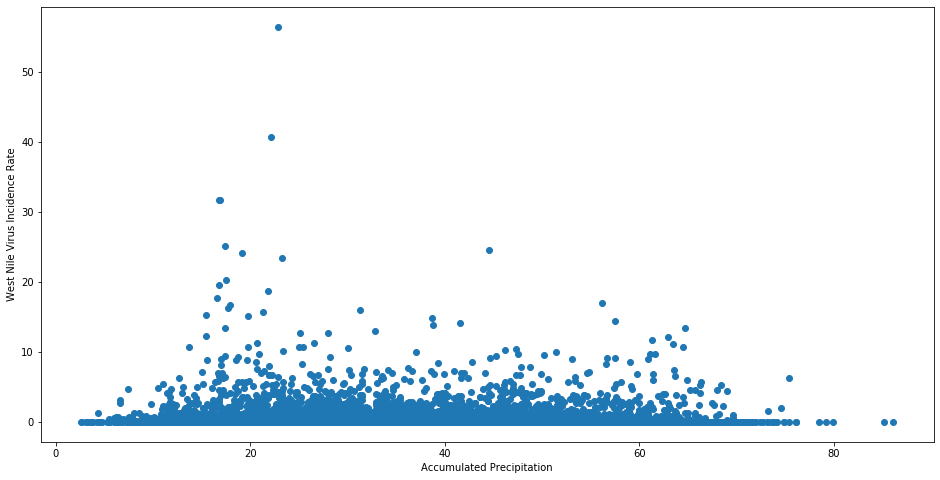

In [132]:
plot_index(indices_dir + 'aggregated/filtered_aggregated_precipitation.csv', 'Accumulated Precipitation')

### Aggregated Precipitation (UNFILTERED)

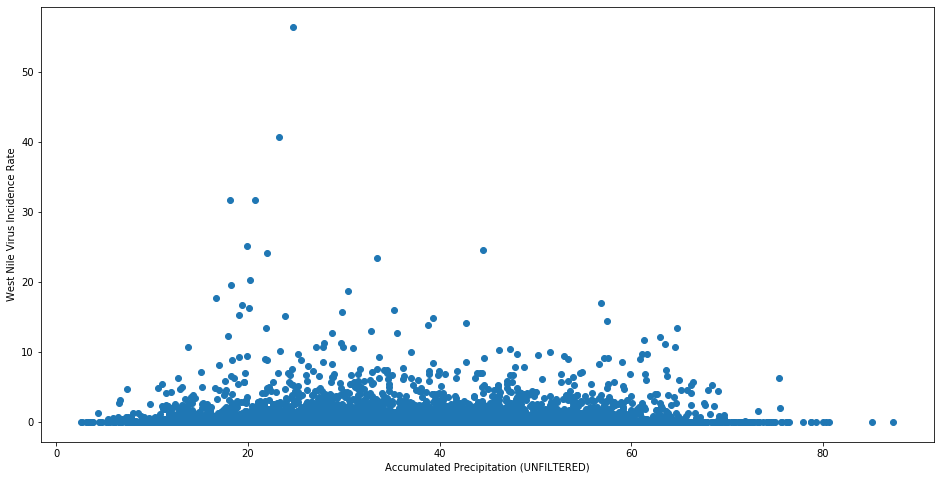

In [139]:
plot_index(indices_dir + 'aggregated/unfiltered_aggregated_precipitation.csv', 'Accumulated Precipitation (UNFILTERED)')

## Dry Day Indices

### Total Dry Days (Filtered for Temperature > 0C)

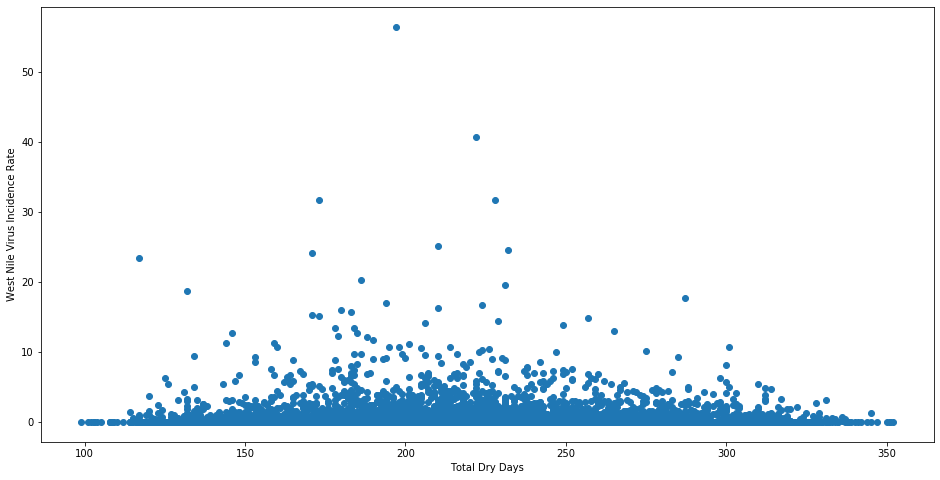

In [133]:
plot_index(indices_dir + 'dry/dry_days_filtered.csv', 'Total Dry Days')


### Total Dry Days (Unfiltered)

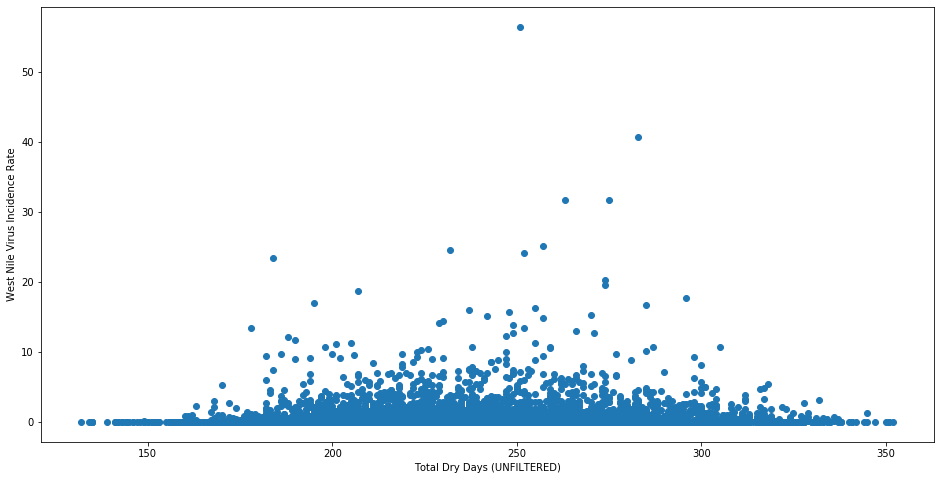

In [137]:
plot_index(indices_dir + 'dry/dry_days_unfiltered.csv', 'Total Dry Days (UNFILTERED)')

### Maximum Consecutive Dry Days

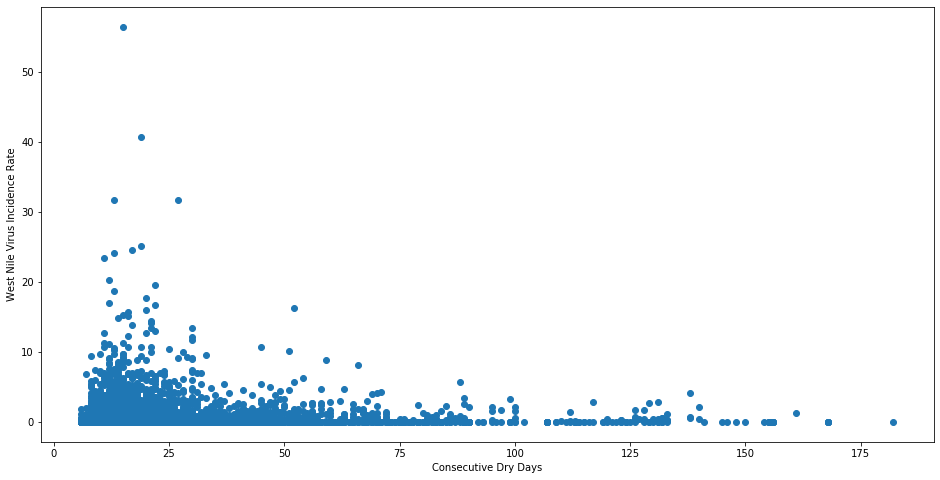

In [138]:
plot_index(indices_dir + 'dry/max_consecutive_dry_days.csv', 'Consecutive Dry Days')

## Gini Index of Inequality
### Weekly Aggregate of Precipitation

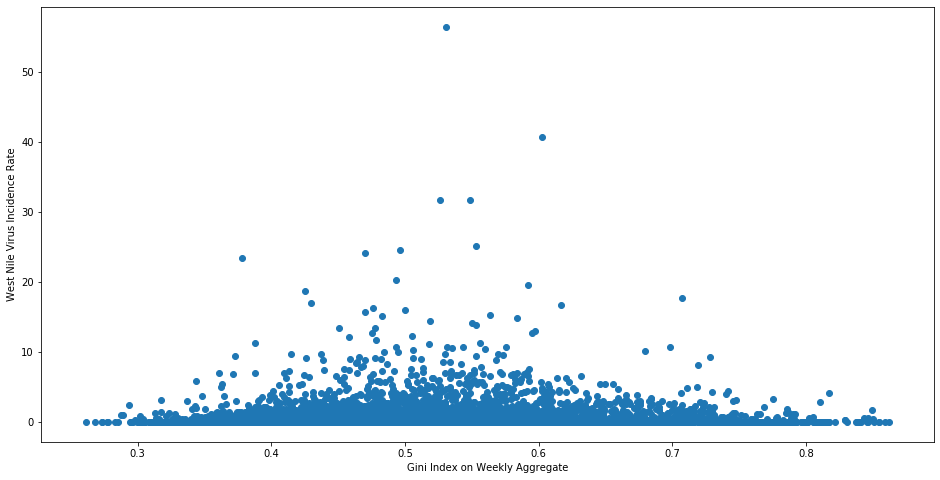

In [141]:
plot_index(indices_dir + 'gini/gini_weekly.csv', 'Gini Index on Weekly Aggregate')

## Theil Index of Inequality

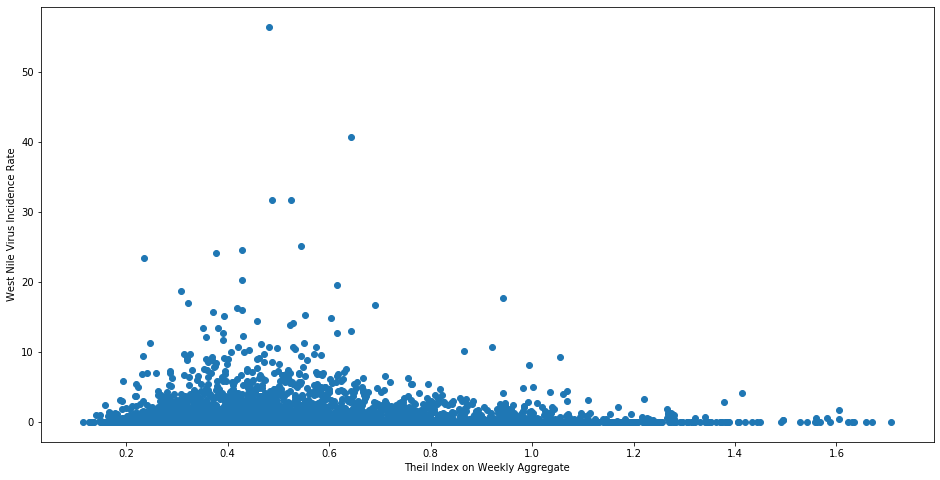

In [144]:
plot_index(indices_dir + 'theil/theil_weekly.csv', 'Theil Index on Weekly Aggregate')